In this step, I imported all the required libraries for data analysis and visualization for conducting the energy modelling of EVs. I used pandas for data manipulation, matplotlib and seaborn for creating static visualizations, plotly for interactive visualizations, and numpy for numerical operations.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np




Here, I loaded the Electric Car dataset from a CSV file into a pandas DataFrame called **ev_data**. I checked the structure of the first few rows of the dataset to understand the kind of data we are dealing with, including columns like **Brand**, **Model**, **Range_Km**, **Efficiency_WhKm**, etc.

In [2]:
# Load the CSV file into a DataFrame
file_path = "D:/T2 2024/SIT378TeamProjectB/Electric Car.csv"  # Replace with the actual path
ev_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
ev_data.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


From the first five rows of the data:

We can observe that **Tesla Model 3 Long Range Dual Motor** has the highest range (450 km) and fast charge speed (940 km/h), while **Honda e** has the lowest range (170 km) and fast charge speed (190 km/h).
**Volkswagen ID.3 Pure** has a relatively low top speed (160 km/h) but is affordable at €30,000.
The dataset contains a diverse set of cars with different attributes, including powertrain types like AWD and RWD.
In the below cell, I used **ev_data.info()** to check the basic information about the dataset, such as column names, data types, and missing values. Then, I explored unique values for categorical columns like **PowerTrain**, **PlugType**, **BodyStyle**, and **Segment** to understand the variety of values in these categories. I also included a method to handle missing values using forward fill or by dropping them.

In [3]:
# Check for missing values and basic info about the data
ev_data.info()

# Fill or drop missing values if necessary
# Example: ev_data.fillna(method='ffill', inplace=True)  # Forward fill
# ev_data.dropna(inplace=True)

# Describe the dataset to get statistical summaries of numerical columns
ev_data.describe()

# Display unique values of categorical columns to understand the data better
print("Unique PowerTrain types:", ev_data['PowerTrain'].unique())
print("Unique Plug types:", ev_data['PlugType'].unique())
print("Unique Body styles:", ev_data['BodyStyle'].unique())
print("Unique Segments:", ev_data['Segment'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
Unique PowerTrain types: ['AWD' 'RWD' 'FWD']
Unique Plug types: ['Type 2 CCS' 'Type 2 CHAdeMO' '

There are 103 entries with 14 columns, and no missing values.
The dataset has a mix of categorical and numerical data. All numerical columns, such as **Range_Km**, **TopSpeed_KmH**, and **AccelSec**, are correctly represented as numeric types.
The **FastCharge_KmH** column seems to be in the object type, which needs further investigation to convert it into a numeric format.
We have three unique PowerTrain types **(AWD, RWD, FWD)** and multiple **PlugType** and **BodyStyle** categories, which will help in further analysis.
In the below cell, I created a scatter plot showing **Efficiency (Wh/Km)** versus **Range (Km)** for different EV models. I used **PowerTrain** to differentiate between colors and **Brand** to assign different markers.

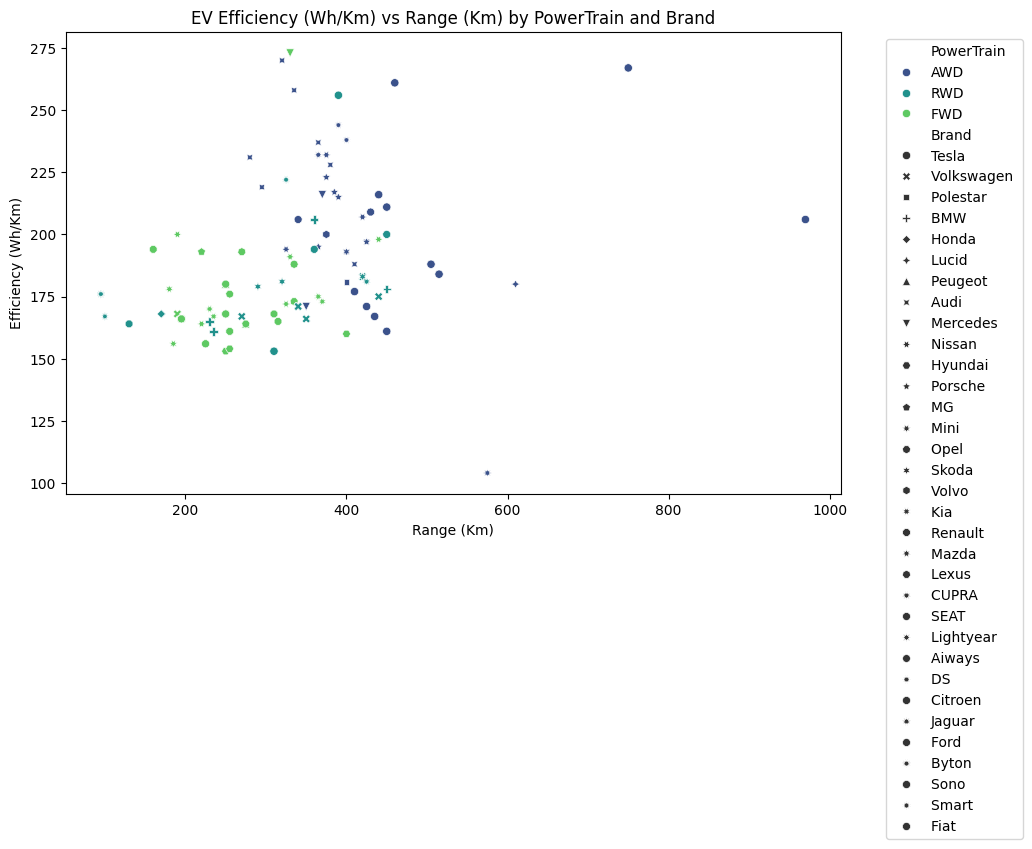

In [4]:
# Plot Efficiency vs Range for different EV models
plt.figure(figsize=(10,6))
sns.scatterplot(data=ev_data, x='Range_Km', y='Efficiency_WhKm', hue='PowerTrain', style='Brand', palette='viridis')
plt.title('EV Efficiency (Wh/Km) vs Range (Km) by PowerTrain and Brand')
plt.xlabel('Range (Km)')
plt.ylabel('Efficiency (Wh/Km)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The plot highlights the trade-off between range and efficiency. Cars with higher range tend to have slightly lower efficiency (more energy is required to cover longer distances).
There is a clear distinction between powertrains. **AWD vehicles** seem to cluster at higher efficiency levels, while **RWD vehicles** are spread across a wider range.

Here, I visualized the relationship between **FastCharge speed (Km/h)** and **Range (Km)**, coloring the points by the presence of rapid charging capability **(RapidCharge)** and adding different styles for various **BodyStyle**.

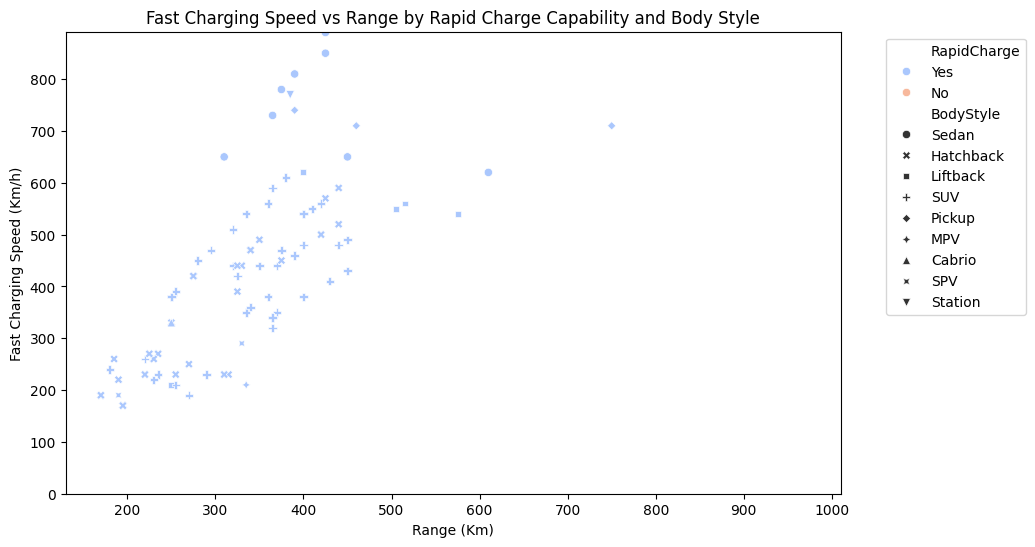

In [11]:
# Plot FastCharge speed vs Range for different EV models
plt.figure(figsize=(10,6))

# Scatter plot with refined y-axis
sns.scatterplot(data=ev_data, x='Range_Km', y='FastCharge_KmH', hue='RapidCharge', style='BodyStyle', palette='coolwarm')

# Set title and axis labels
plt.title('Fast Charging Speed vs Range by Rapid Charge Capability and Body Style')
plt.xlabel('Range (Km)')
plt.ylabel('Fast Charging Speed (Km/h)')

# Set y-axis limits (optional: adjust the range based on your dataset)
plt.ylim(0, ev_data['FastCharge_KmH'].quantile(0.95))  # Cut off outliers at the 95th percentile

# Round the y-axis ticks to remove decimals
plt.yticks(np.arange(0, ev_data['FastCharge_KmH'].quantile(0.95), step=100))

# Adjust legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


EV models with rapid charging capability tend to have a higher fast charge speed. Sedans and SUVs dominate the high-speed fast charging region, while hatchbacks mostly cluster around moderate fast charging speeds.
The distribution of fast charging speeds suggests that only a few models achieve very high charging rates (>900 Km/h), likely high-end models like **Tesla**.

The below cell contains a histogram of the prices of EV models, helping us understand the price distribution. I added a kernel density estimate (KDE) to get a smoother view of the distribution.

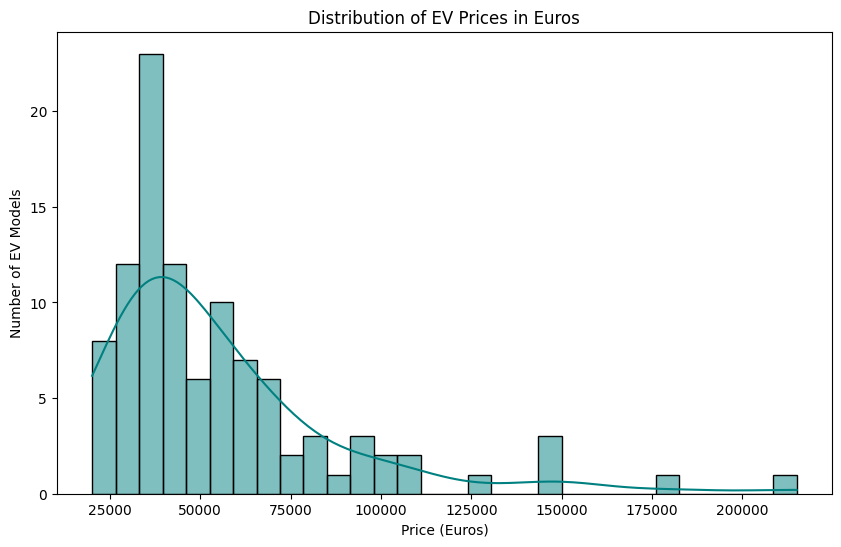

In [6]:
# Plot a histogram of EV prices
plt.figure(figsize=(10,6))
sns.histplot(ev_data['PriceEuro'], bins=30, kde=True, color='teal')
plt.title('Distribution of EV Prices in Euros')
plt.xlabel('Price (Euros)')
plt.ylabel('Number of EV Models')
plt.show()


The price distribution is right-skewed, meaning most EVs are concentrated in the lower price range, while a few models are much more expensive.
A majority of models are priced between €20,000 and €60,000, with a few premium models costing upwards of €80,000.

I used a boxplot in the next cell to compare acceleration times (0-100 km/h) across different PowerTrain types.



C:\Users\user\AppData\Local\Temp\ipykernel_1784\3893867569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ev_data, x='PowerTrain', y='AccelSec', palette='Set2')


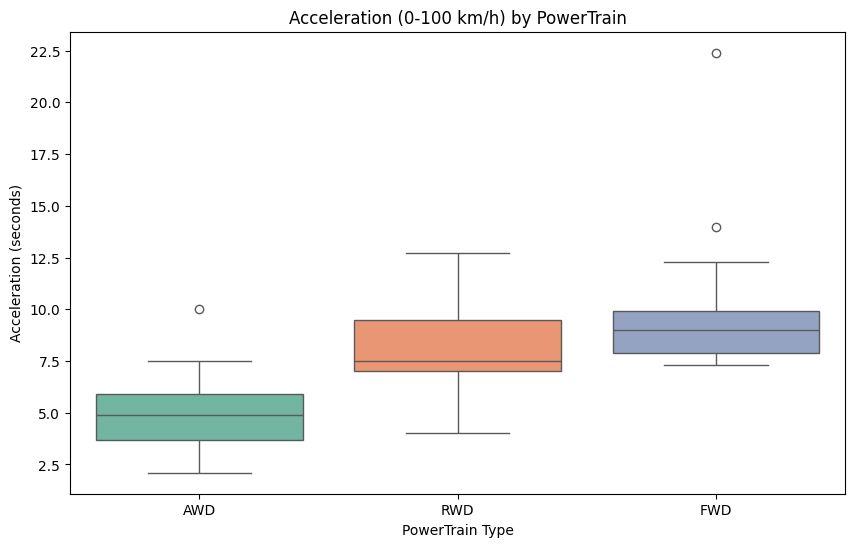

In [7]:
# Boxplot of Acceleration (0-100 km/h) grouped by PowerTrain
plt.figure(figsize=(10,6))
sns.boxplot(data=ev_data, x='PowerTrain', y='AccelSec', palette='Set2')
plt.title('Acceleration (0-100 km/h) by PowerTrain')
plt.xlabel('PowerTrain Type')
plt.ylabel('Acceleration (seconds)')
plt.show()


**AWD vehicles** tend to have the best acceleration performance, with lower acceleration times (faster speed).
**FWD vehicles** exhibit the slowest acceleration times.
The **RWD category** has a wide range of acceleration times, indicating variability in the performance of cars in this category.
Then, in the below cell, I replaced non-numeric values (such as '-') with **NaN** and converted necessary columns to numeric types. Then, I created a **heatmap** to visualize correlations between the numerical columns.



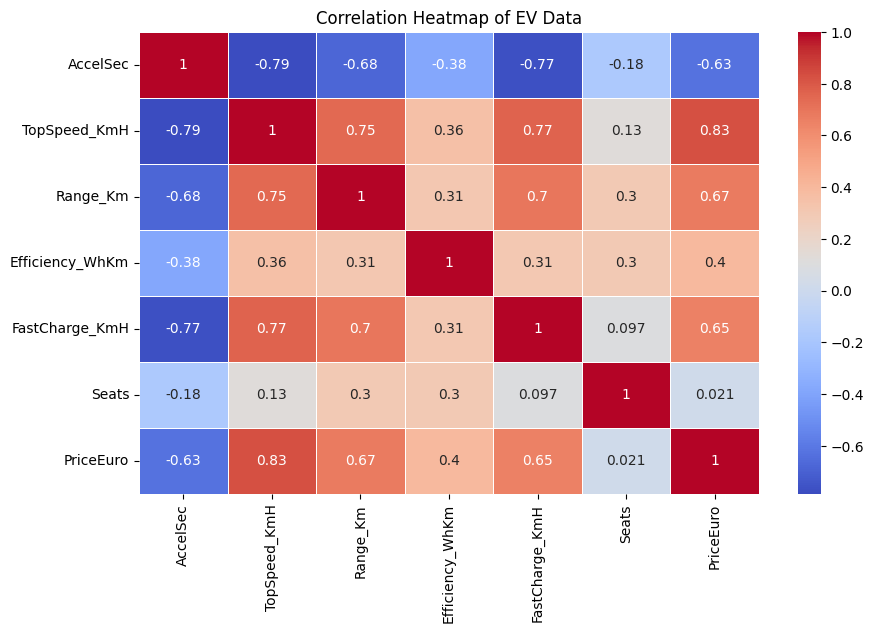

In [9]:
# Replace any non-numeric values ('-' or others) with NaN
ev_data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']] = \
    ev_data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']].replace('-', np.nan)

# Convert the columns to numeric (if they aren't already)
ev_data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']] = \
    ev_data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']].apply(pd.to_numeric)

# Calculate correlations between numerical columns
plt.figure(figsize=(10,6))
corr = ev_data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']].corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of EV Data')
plt.show()


There is a strong positive correlation between **Range** and **Price** (higher range models tend to be more expensive).
**TopSpeed** and **AccelSec** are negatively correlated, which makes sense as higher speed cars tend to accelerate faster.
**Seats** and **Price** show some positive correlation, indicating that larger vehicles with more seats tend to be more expensive.
Finally, I plotted **Range vs Price** and used **Segment** to categorize the data points.

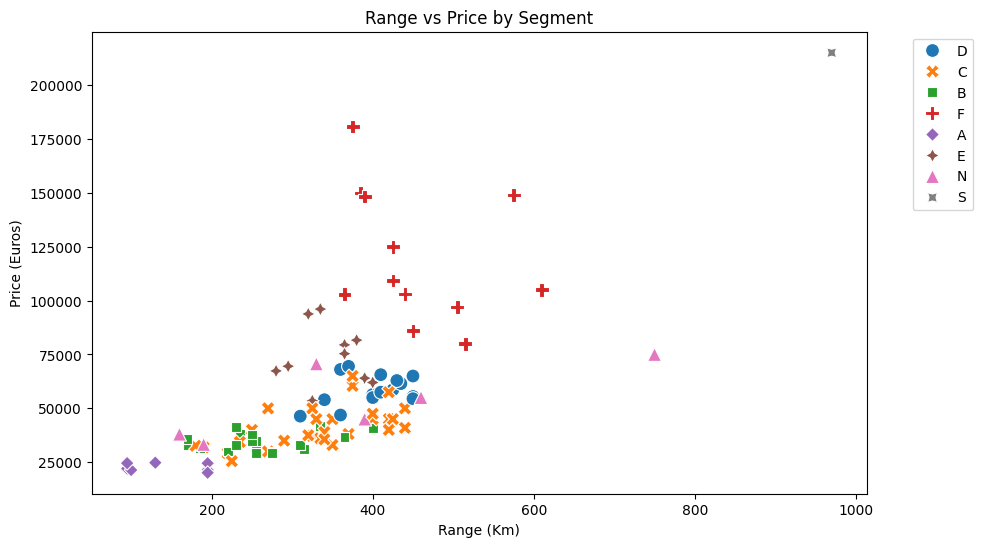

In [10]:
# Scatter plot to visualize Range vs Price categorized by Segment
plt.figure(figsize=(10,6))
sns.scatterplot(data=ev_data, x='Range_Km', y='PriceEuro', hue='Segment', style='Segment', palette='tab10', s=100)
plt.title('Range vs Price by Segment')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euros)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The plot reveals a clear trend: higher-range vehicles tend to be in the higher price segment, particularly in the **D and E segments**.
**Segment C and B vehicles** are clustered in the **lower price range** with **shorter ranges**.
The plot shows that vehicles in the **premium segments (D, E)** offer **better range** and come at a **premium cost**.